# Descenso del gradiente
### Empleado para encontrar el mínimo de una función

Importaciones

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def get_gradient(f, x):
    """
    Calcula el gradiente de cualquier función f en el punto x.

    Parámetros:
    -----------
    f : función
        La función para la cual se va a calcular el gradiente.
    x : ndarray
        El punto en el cual se va a calcular el gradiente.

    Retorna:
    --------
    ndarray
        El gradiente de la función en el punto x.
    """
    h = 1e-10
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += h
        x2[i] -= h
        grad[i] = (f(x1) - f(x2)) / (2 * h)
    return grad

Clase Gradiente

In [23]:
class Gradient:
    def __init__(self, learning_rate, iterations):
        """
        Inicializa el optimizador de descenso de gradiente.

        Parámetros:
        -----------
        learning_rate : float
            El tamaño del paso para cada iteración del descenso de gradiente.
        iterations : int
            El número de iteraciones para ejecutar el algoritmo de descenso de gradiente.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations

    def run(self, f, x):
        """
        Ejecuta el algoritmo de descenso de gradiente para encontrar el mínimo de la función.

        Parámetros:
        -----------
        f : función
            La función a minimizar.
        x : ndarray
            El punto inicial para comenzar el descenso de gradiente.

        Retorna:
        --------
        ndarray
            El punto que representa el mínimo encontrado por el descenso de gradiente.
        """
        for i in range(self.iterations):
            gradient = get_gradient(f, x)
            x = x - self.learning_rate * gradient
        return x

# Visualización

In [24]:
def plot_function_and_minimum(f, x_min):
    """
    Plot the function and the minimum found by gradient descent.

    Parameters:
    -----------
    f : function
        The function to be plotted.
    x_min : ndarray
        The point representing the minimum found by gradient descent.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a grid of points
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.6)

    # Plot the minimum point
    ax.scatter(x_min[0], x_min[1], f(x_min), color='r', s=100)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    plt.title('Function and Minimum Found by Gradient Descent')
    plt.show()

# Testing

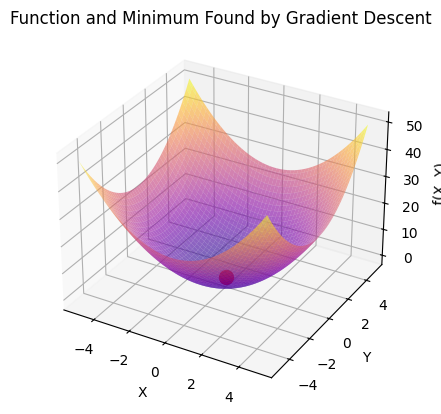

In [25]:
f = lambda x: x[0] ** 2 + x[1] ** 2
x = np.array([3.0, 4.0])
gradient = Gradient(0.1, 100)
x_min = gradient.run(f, x)
plot_function_and_minimum(f, x_min)